# Project of sale analysis

## Code base

In [3]:
# Libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create a date range for 12 months (365 days)
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Create a dictionary with sample data
data = {
    'Date': date_range,
    'Product': np.random.choice(['A','B','C','D'], size=len(date_range)),
    'Sales': np.random.randint(100, 1000, size = len(date_range)),
    'Revenue': np.random.uniform(1000, 5000, size=len(date_range))
}

# Create a pandas DataFrame with the generated data
df = pd.DataFrame(data)

# Display the DataFrame
df

,Date,Product,Sales,Revenue
0,2023-01-01,C,514,3247.466769
1,2023-01-02,D,397,1954.387439
2,2023-01-03,A,710,3719.379120
3,2023-01-04,C,362,3959.635042
4,2023-01-05,C,863,1952.944610
...,...,...,...,...
360,2023-12-27,D,647,4514.516461
361,2023-12-28,A,195,2981.694506
362,2023-12-29,A,763,3965.843645
363,2023-12-30,B,762,3292.603397


## Exploratory Data Analysis (EDA)

### a) Descriptive analysis

                      Date       Sales      Revenue
count                  365  365.000000   365.000000
mean   2023-07-02 00:00:00  561.405479  3045.354597
min    2023-01-01 00:00:00  101.000000  1010.380098
25%    2023-04-02 00:00:00  319.000000  2083.830570
50%    2023-07-02 00:00:00  573.000000  3125.063016
75%    2023-10-01 00:00:00  788.000000  3965.843645
max    2023-12-31 00:00:00  997.000000  4990.770464
std                    NaN  269.951481  1128.790493
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     365 non-null    datetime64[ns]
 1   Product  365 non-null    object        
 2   Sales    365 non-null    int32         
 3   Revenue  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 10.1+ KB
None

Unique values in Date:
Date
2023-01-01    1
2023-09-09    1
2023-09-07

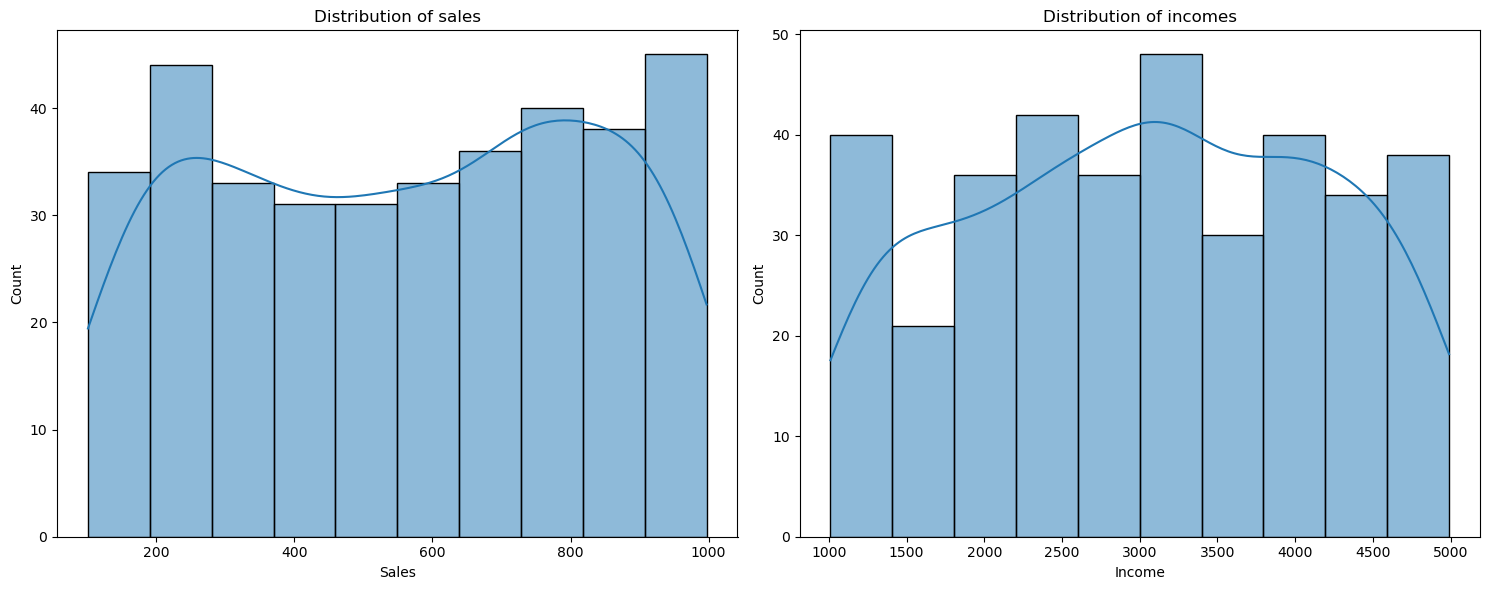

In [6]:
# Descriptive statistics
print(df.describe()) #Provide summary statistics of the DataFrame

# Information about the kind of data and unique data
print(df.info())

# Counting for unique values per column
for column in df.columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())

# Distribution of sales and income
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(df['Sales'], kde=True, ax=ax1)
ax1.set_title('Distribution of sales')
ax1.set_xlabel('Sales')
              
sns.histplot(df['Revenue'], kde=True, ax=ax2)
ax2.set_title('Distribution of incomes')
ax2.set_xlabel('Income')
             
plt.tight_layout()
plt.show()

### b) Variable type settings

In [22]:
# Verify present variable types
print(df.dtypes)

#Get sure about "Date" it's a float type
df['Date'] = pd.to_datetime(df['Date'])

#Get sure about "Product" it's a category type
df['Product'] = df['Product'].astype('category')

#Get sure about "Sales" it's a integer type
df['Sales'] = df['Sales'].astype(int)

#Get sure about "Date" it's a float type
df['Revenue'] = df['Revenue'].astype(float)

# Verify the new data types
print(df.dtypes)

Date       datetime64[ns]
Product            object
Sales               int32
Revenue           float64
dtype: object
Date       datetime64[ns]
Product          category
Sales               int32
Revenue           float64
dtype: object
